<a href="https://colab.research.google.com/github/ShripadJagtap/LGMVIP-DataScience/blob/main/LGMVIP_TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: SHRIPAD JAGTAP**


**DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER**



**INTERMEDIATE LEVEL TASK 1 : Exploratory Data Analysis on Dataset - Terrorism**



> 



***STEP 1: IMPORT ALL THE REQUIRED PYTHON LIBRARIES***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
for i in data.columns:
    print(i, end=" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [ ]:
cols = data.columns

In [ ]:
cols = []
for i in cols:
    if data[i].isnull().sum() > 1500000:
        cols.append(i)

In [ ]:
data = data.drop(cols, axis=1)

In [ ]:
data.shape

(181691, 135)

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
countries_with_most_terrorism = data.country_txt.value_counts().head(10)
countries_with_most_terrorism

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

In [ ]:
countries = list(countries_with_most_terrorism.index)
countries

['Iraq',
 'Pakistan',
 'Afghanistan',
 'India',
 'Colombia',
 'Philippines',
 'Peru',
 'El Salvador',
 'United Kingdom',
 'Turkey']

Text(0.5, 1.0, 'Countries with most terrorism')

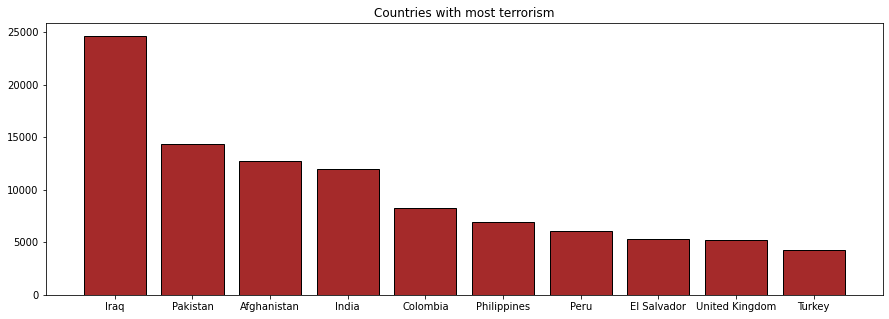

In [ ]:
x, y = countries_with_most_terrorism.index, countries_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y,align="center",edgecolor="black",color="brown")
plt.xticks(rotation=0)
plt.title("Countries with most terrorism")

In [ ]:
# Filtering country data
data_countries = data[data['country_txt'].isin(countries)]
data_countries.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
26,197001210001,1970,1,21,NaN,0,NaN,160,Philippines,5,Southeast Asia,Metropolitan Manila,Quezon City,14.674280,121.057495,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,JUSMAG HQ,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),5000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
39,197001310001,1970,1,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Bamban,15.675051,120.331618,1.0,0,NaN,NaN,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,0,0,9,Unknown,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",U.S. Navy,Seaman,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
96,197003000001,1970,3,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Metropolitian Manila,Manila,14.596051,120.978666,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),500.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
150,197003240001,1970,3,24,NaN,0,NaN,160,Philippines,5,Southeast Asia,Pampanga,Angeles,15.153002,120.591942,1.0,0,NaN,NaN,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,9,Unknown,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",U.S. Air Force,officer,...,NaN,NaN,NaN,1.0,1.0,NaN,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Displaying only column names of country data.
data_countries.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# Filtering top 10 Countries on which max attacks by terrorists
raw_data = data_countries.iyear.value_counts().head(10)
raw_data

2014    9805
2016    8257
2015    8209
2013    8193
2017    6685
2012    5784
2011    3729
2010    3515
2009    3387
2008    3103
Name: iyear, dtype: int64

Text(0.5, 1.0, 'Years with most number of terrorism actively.')

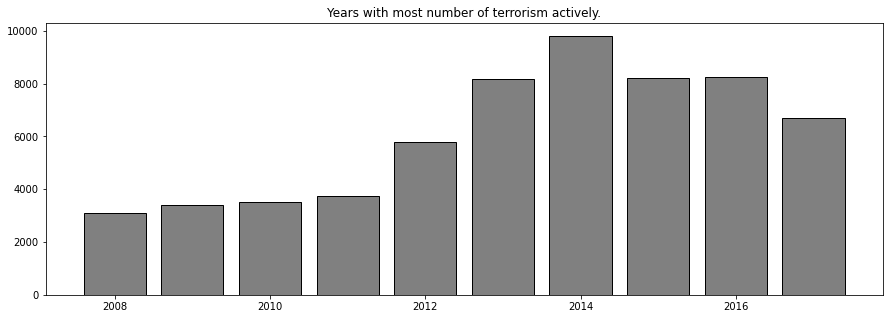

In [ ]:
# Displaying years with most number of terrorism activities happend.

year = raw_data
x, y = year.index, year.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "Black", color = "grey")
plt.xticks(rotation=0)
plt.title("Years with most number of terrorism actively.")

Text(0.5, 1.0, 'Type of Target')

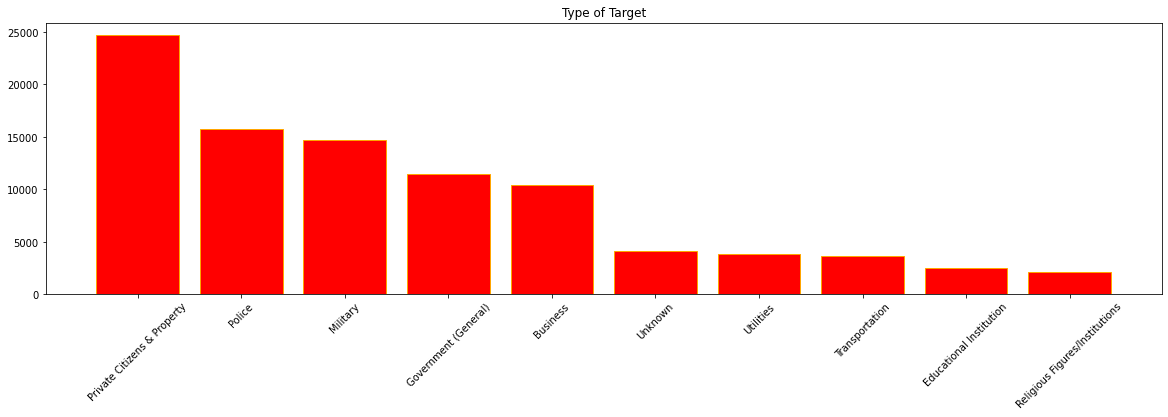

In [ ]:
# Top 10 Targets that are attacked most by terrorists

target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(target.index, target.values, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Type of Target")

(-1.1136966344205943, 1.171258787543285, -1.11132638453388, 1.1868668627447285)

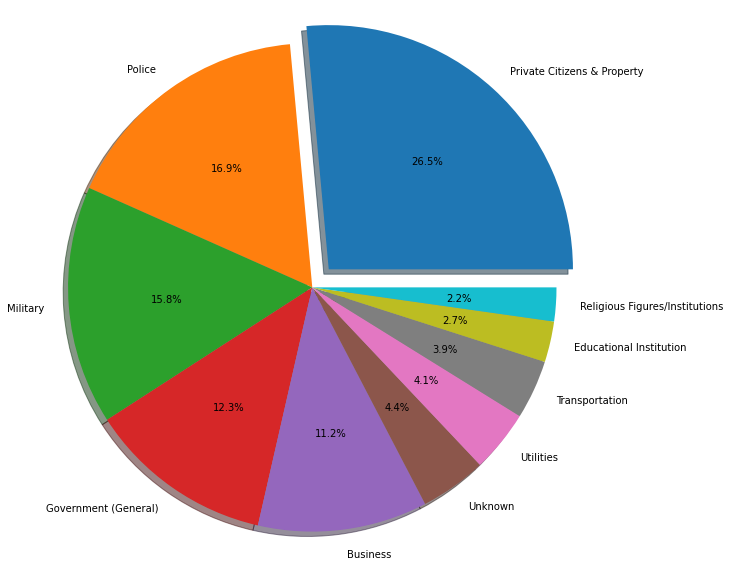

In [ ]:
target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,10))
explode = (0.1,0,0,0,0,0,0,0,0,0)  # Only "Explodes" the 2nd slice(i.e. 'Hogs')

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(target.values, explode = explode, labels = target.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

Text(0.5, 1.0, 'Type of Attacks')

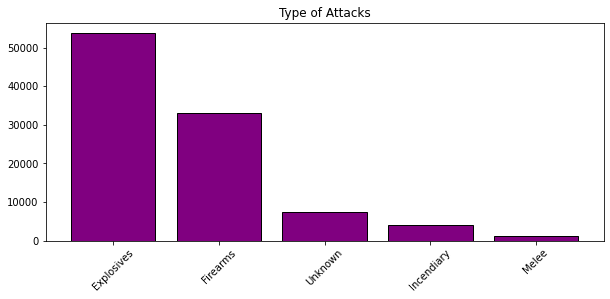

In [ ]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fix,ax = plt.subplots(figsize=(10,4))
ax.bar(weapon_types.index, weapon_types.values, edgecolor="black", color = "purple")
plt.xticks(rotation=45)
plt.title("Type of Attacks")

(-1.1226728620009205,
 1.1010796600952812,
 -1.2197943912854097,
 1.2199717613349081)

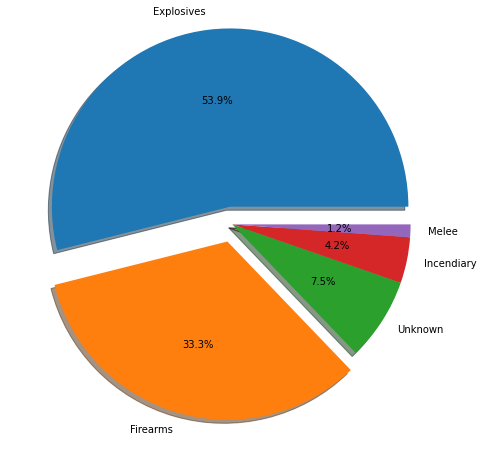

In [ ]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

(-1.1226728620009205,
 1.1010796600952812,
 -1.2197943912854097,
 1.2199717613349081)

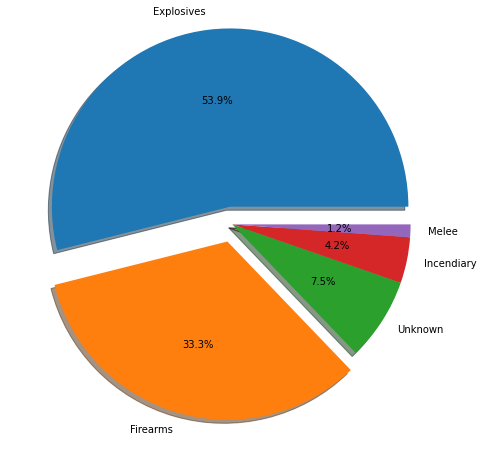

In [ ]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [ ]:
data.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Type of Attacks')

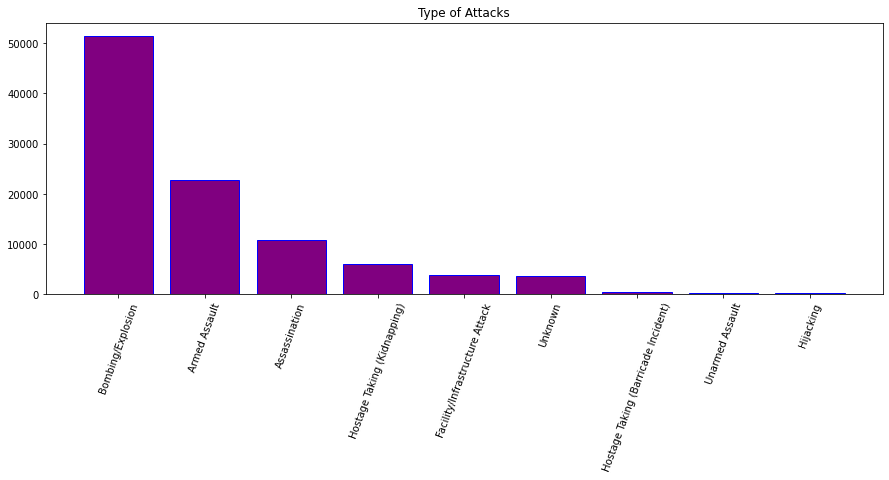

In [ ]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(attack_type.index,attack_type.values, edgecolor = "blue", color = "purple")
plt.xticks(rotation=70)
plt.title("Type of Attacks")

(-1.1142897270466743,
 1.100680463192682,
 -1.1093037601501359,
 1.2108992163359165)

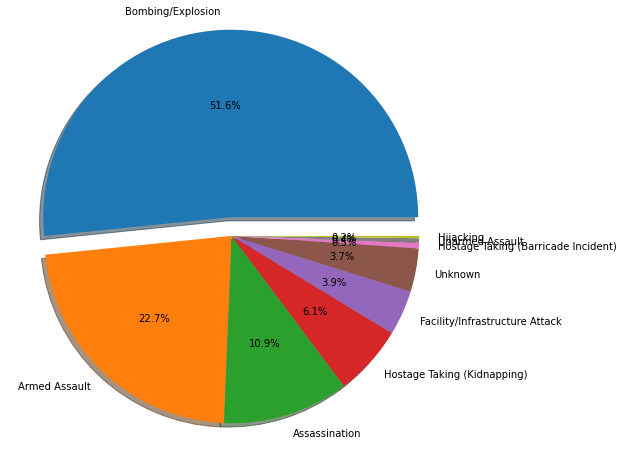

In [ ]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(attack_type.values, explode = explode, labels = attack_type.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [ ]:
# Top 10 most cities where terrorist attacks actioned by terrorists.

cities_with_most_terrorism = data.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

Text(0.5, 1.0, 'Cities with most terrorism')

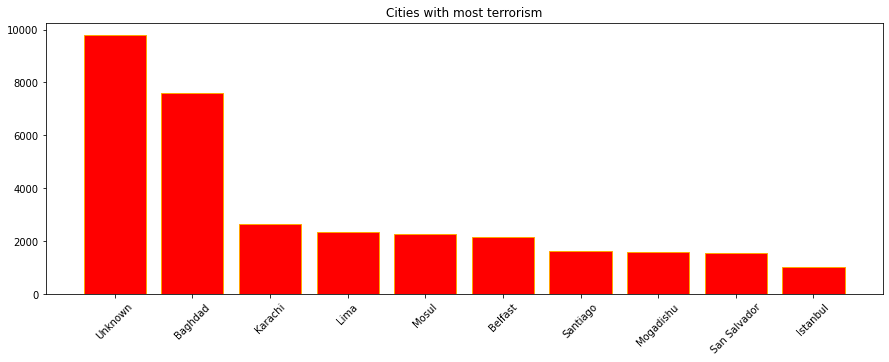

In [ ]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

Text(0.5, 1.0, 'Cities with most terrorism')

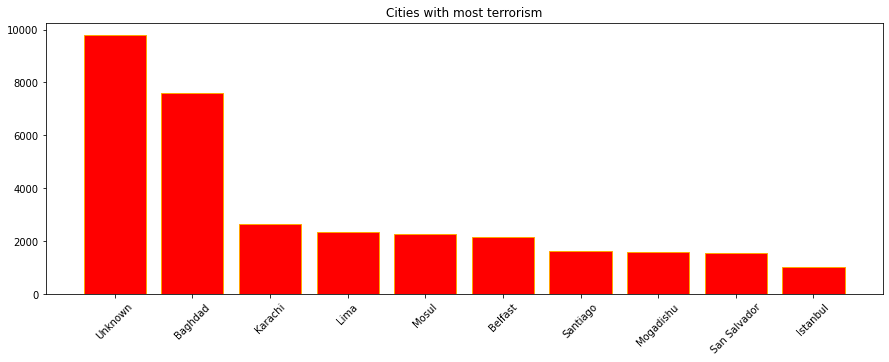

In [ ]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

In [ ]:
religios_target = data[data["targtype1_txt"]=="Religious Figures/Institutions"]
religios_target.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
35,197001280002,1970,1,28,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0,Front of building,1/28/1970: Unknown perpetrators detonated an e...,1,1,1,1.0,2.0,Other Crime Type,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Jewish Synagogue,Temple De Hirsch,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),3000.0,Small hole in the door,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,"""Synagogue Blasted,"" Tri City Herald, January ...",NaN,Hewitt Project,-9,-9,0,-9,NaN
49,197002060003,1970,2,6,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0,NaN,2/6/1970: Unknown perpetrators detonated a bom...,1,1,1,1.0,2.0,Other Crime Type,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Jewish Synagogue,NaN,...,NaN,NaN,Dynamite,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Door of synagogue damaged and windows shattere...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This might be linked with 197001280002. Both ...,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9,-9,0,-9,NaN
117,197003090004,1970,3,9,NaN,0,NaN,217,United States,1,North America,Connecticut,Bridgeport,41.181880,-73.191269,1.0,0,NaN,3/9/1970: Unknown perpetrators firebombed Shil...,1,1,1,1.0,2.0,Other Crime Type,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,African American Church,Shiloh Baptist Church,...,NaN,NaN,Firebomb,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Minor damage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9,-9,0,-9,NaN
190,197004130003,1970,4,13,NaN,0,NaN,217,United States,1,North America,Missouri,Kansas City,39.176086,-94.574127,1.0,0,NaN,"4/13/1970: In a series of related attacks, unk...",1,1,1,1.0,2.0,Other Crime Type,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Linwood Methodist Church,"Linwood Methodist Church, Kansas City",...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Natural gas regulator of Church was destroyed....,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Part of a multiple attack with 197004130002 an...,Committee on Government Operations United Stat...,"""Teamster Walkouts Close More Plants,"" Washing...",NaN,Hewitt Project,-9,-9,0,-9,"197004130002, 197004130003, 197004130004"
204,197004190001,1970,4,19,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0,Capital Hill Area,"4/19/1970: In a simultaneous bombing campaign,...",1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Church,Japanese Presbyterian Church,...,NaN,NaN,All four bombs went off in a span of 90 minutes.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),2000.0,NaN,0.

Text(0.5, 1.0, 'Countries with most terrorism on religious Figures')

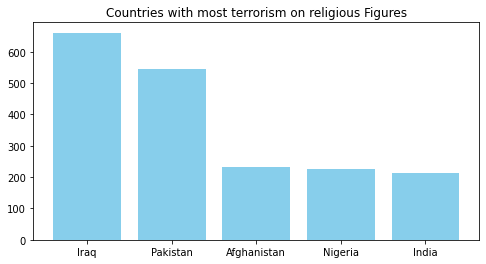

In [ ]:
# Graphical representation of top 5 Countries with most terrorism on religious Figures or Institutions.

x, y = religios_target["country_txt"].value_counts().head().index,religios_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y, color = "skyblue")
plt.title("Countries with most terrorism on religious Figures")

(-1.1050129029987616,
 1.1472209570618181,
 -1.113406290349518,
 1.2072781762785978)

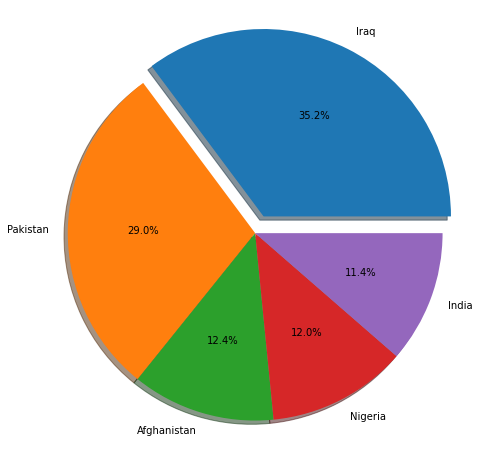

In [ ]:
# Top 10 most type of attacks actioned by terrorists.

y, x = religios_target["country_txt"].value_counts().head().index,religios_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(x, explode = explode, labels = y, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.